In [1]:
import numpy as np 
import pandas as pd 
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
#Scaling
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import os
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
#pip install openpyxl

In [2]:
data = pd.read_csv('merged_dataset.csv')
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Output (S)
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 11 columns):
G             7861 non-null int64
C             7861 non-null int64
B             7861 non-null int64
A             7861 non-null int64
Ia            7861 non-null float64
Ib            7861 non-null float64
Ic            7861 non-null float64
Va            7861 non-null float64
Vb            7861 non-null float64
Vc            7861 non-null float64
Output (S)    7861 non-null int64
dtypes: float64(6), int64(5)
memory usage: 675.7 KB


In [4]:
data.describe

<bound method NDFrame.describe of       G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0     1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1     1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2     1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3     1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4     1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   
...  .. .. .. ..         ...         ...         ...       ...       ...   
7856  0  0  0  0  -66.237921   38.457041   24.912239  0.094421 -0.552019   
7857  0  0  0  0  -65.849493   37.465454   25.515675  0.103778 -0.555186   
7858  0  0  0  0  -65.446698   36.472055   26.106554  0.113107 -0.558211   
7859  0  0  0  0  -65.029633   35.477088   26.684731  0.122404 -0.561094   
7860  0  0  0  0  -64.598401   34.480799   27.250065  0.131669 -0.563835   

            Vc  Output (S)  
0    -0.267815          

In [5]:
data.isnull().sum()

G             0
C             0
B             0
A             0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
Output (S)    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.corr()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Output (S)
G,1.000000,-0.137611,0.196609,0.755273,0.041310,-0.031068,-0.003156,0.023808,-0.024048,0.002122,0.572091
C,-0.137611,1.000000,0.747612,0.199335,0.000232,-0.109211,0.164323,0.018188,-0.068840,0.052998,0.548275
B,0.196609,0.747612,1.000000,0.448807,0.014102,-0.139981,0.133321,0.037128,-0.075973,0.042473,0.733369
A,0.755273,0.199335,0.448807,1.000000,0.036341,-0.074905,0.054071,0.029940,-0.053036,0.025873,0.757463
Ia,0.041310,0.000232,0.014102,0.036341,1.000000,-0.374241,-0.276457,0.035682,-0.274612,0.246043,0.030039
Ib,-0.031068,-0.109211,-0.139981,-0.074905,-0.374241,1.000000,-0.528291,0.029118,0.032101,-0.060023,-0.117419
Ic,-0.003156,0.164323,0.133321,0.054071,-0.276457,-0.528291,1.000000,-0.069137,-0.056967,0.122919,0.112589
Va,0.023808,0.018188,0.037128,0.029940,0.035682,0.029118,-0.069137,1.000000,-0.480247,-0.450225,0.025622
Vb,-0.024048,-0.068840,-0.075973,-0.053036,-0.274612,0.032101,-0.056967,-0.480247,1.000000,-0.566986,-0.057885
Vc,0.002122,0.052998,0.042473,0.025873,0.246043,-0.060023,0.122919,-0.450225,-0.566986,1.000000,0.034864


<AxesSubplot:>

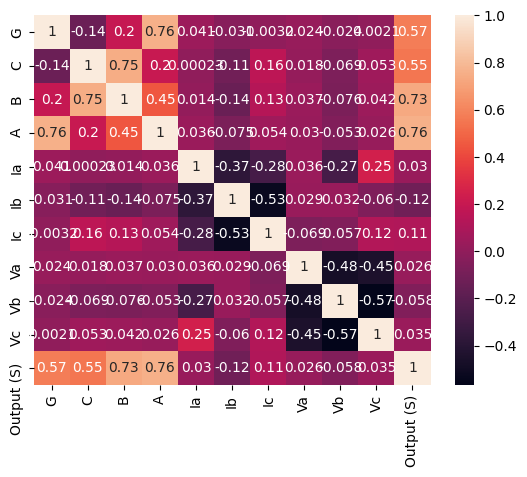

In [8]:
sns.heatmap(data.corr(), annot = True)

In [9]:
X = data.drop(['Output (S)'],axis=1)
X

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [10]:
y = data['Output (S)']
y

0       1
1       1
2       1
3       1
4       1
       ..
7856    0
7857    0
7858    0
7859    0
7860    0
Name: Output (S), Length: 7861, dtype: int64

<AxesSubplot:xlabel='Output (S)', ylabel='count'>

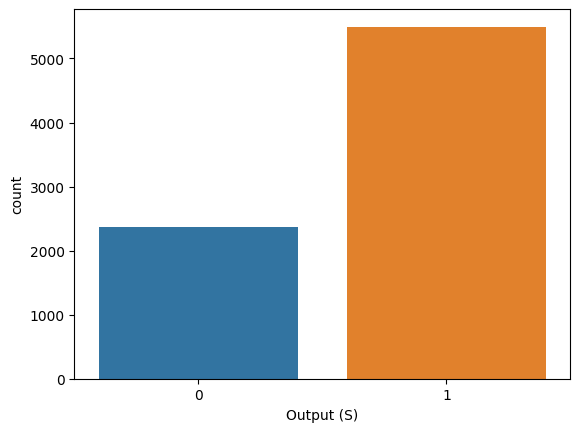

In [11]:
sns.countplot(x=y)

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42 )

In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Using TensorFlow backend.


<AxesSubplot:xlabel='Output (S)', ylabel='count'>

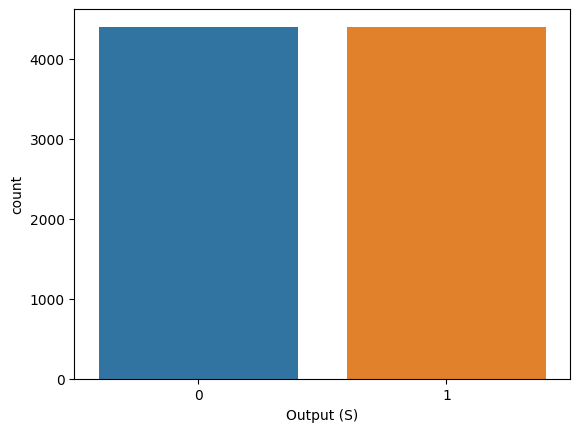

In [14]:
sns.countplot(x=y_train_resampled)

In [15]:
labels=['Normal', 'Failure']

In [16]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [17]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Model loaded successfully.
DecisionTreeClassifier Accuracy    : 87.22186904005086
DecisionTreeClassifier Precision   : 90.78826764436296
DecisionTreeClassifier Recall      : 85.28550512445095
DecisionTreeClassifier FSCORE      : 86.30019520205904

 DecisionTreeClassifier classification report
               precision    recall  f1-score   support

      Normal       0.71      1.00      0.83       482
     Failure       1.00      0.82      0.90      1091

    accuracy                           0.87      1573
   macro avg       0.85      0.91      0.86      1573
weighted avg       0.91      0.87      0.88      1573



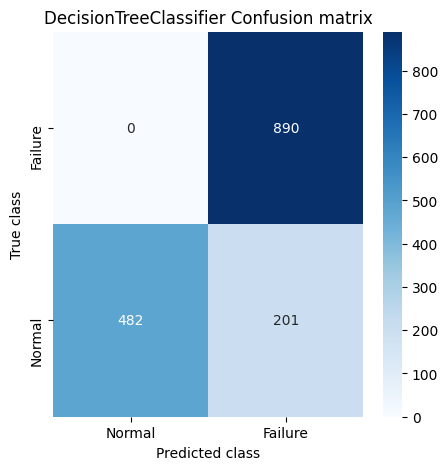

In [18]:
from sklearn.tree import DecisionTreeClassifier
import joblib
import os

if os.path.exists('model/DecisionTreeClassifier.pkl'):
    # Load the trained model from the file
    DTC = joblib.load('model/DecisionTreeClassifier.pkl')
    print("Model loaded successfully.")
    predict = DTC.predict(X_test)
    calculateMetrics("DecisionTreeClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    DTC = DecisionTreeClassifier(max_depth=1)
    DTC.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(DTC, 'model/DecisionTreeClassifier.pkl')
    print("Model saved successfully.")
    predict = DTC.predict(X_test)
    calculateMetrics("DecisionTreeClassifier", predict, y_test)


Model loaded successfully.
RandomForestClassifier Accuracy    : 100.0
RandomForestClassifier Precision   : 100.0
RandomForestClassifier Recall      : 100.0
RandomForestClassifier FSCORE      : 100.0

 RandomForestClassifier classification report
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       482
     Failure       1.00      1.00      1.00      1091

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



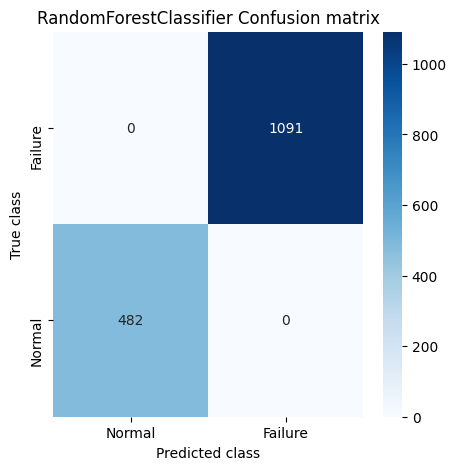

In [19]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

if os.path.exists('model/RandomForestClassifier.pkl'):
    # Load the trained model from the file
    RFC = joblib.load('model/RandomForestClassifier.pkl')
    print("Model loaded successfully.")
    predict = RFC.predict(X_test)
    calculateMetrics("RandomForestClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    RFC = RandomForestClassifier(n_estimators=40,max_depth=8)
    RFC.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(RFC, 'model/RandomForestClassifier.pkl')
    print("Model saved successfully.")
    predict = RFC.predict(X_test)
    calculateMetrics("RandomForestClassifier", predict, y_test)


In [20]:
samp = data.sample(20)
samp

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Output (S)
3673,0,1,1,1,-781.569455,747.335904,36.340893,0.000022,0.036688,-0.036710,1
7235,0,0,0,0,55.223683,3.721712,-61.990447,0.079563,0.491297,-0.570860,0
6711,0,0,0,0,-28.154613,-8.776529,33.728820,0.509232,-0.506819,-0.002413,0
5702,0,0,0,0,18.906346,72.333023,-94.470130,-0.489274,0.585560,-0.096286,0
3344,0,1,1,1,-643.919576,-190.892094,836.986707,-0.020345,0.027275,-0.006929,1
4941,1,1,1,1,533.045604,-877.036955,343.989090,-0.018096,-0.024096,0.042192,1
4822,1,1,1,1,-830.240583,153.147315,677.091043,-0.031327,0.040405,-0.009078,1
2029,1,0,1,1,-475.837733,-393.188183,-54.406936,-0.042168,0.357549,-0.315381,1
6176,0,0,0,0,-50.101257,97.774876,-51.044892,-0.548597,0.040741,0.507856,0
4812,1,1,1,1,-867.296722,287.379178,579.915329,-0.026478,0.041917,-0.015439,1


In [21]:
samp.to_csv('testdata.csv')

In [22]:
test=pd.read_csv(r'testdata.csv')
test

,Unnamed: 0,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Output (S)
0,3673,0,1,1,1,-781.569455,747.335904,36.340893,0.000022,0.036688,-0.036710,1
1,7235,0,0,0,0,55.223683,3.721712,-61.990447,0.079563,0.491297,-0.570860,0
2,6711,0,0,0,0,-28.154613,-8.776529,33.728820,0.509232,-0.506819,-0.002413,0
3,5702,0,0,0,0,18.906346,72.333023,-94.470130,-0.489274,0.585560,-0.096286,0
4,3344,0,1,1,1,-643.919576,-190.892094,836.986707,-0.020345,0.027275,-0.006929,1
5,4941,1,1,1,1,533.045604,-877.036955,343.989090,-0.018096,-0.024096,0.042192,1
6,4822,1,1,1,1,-830.240583,153.147315,677.091043,-0.031327,0.040405,-0.009078,1
7,2029,1,0,1,1,-475.837733,-393.188183,-54.406936,-0.042168,0.357549,-0.315381,1
8,6176,0,0,0,0,-50.101257,97.774876,-51.044892,-0.548597,0.040741,0.507856,0
9,4812,1,1,1,1,-867.296722,287.379178,579.915329,-0.026478,0.041917,-0.015439,1


In [23]:
test = data.drop(['Output (S)'],axis=1)

In [24]:
predict=RFC.predict(test)
predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Output (S),prediction
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1,Failure
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1,Failure
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1,Failure
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1,Failure
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0,Normal
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0,Normal
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0,Normal
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0,Normal
